# Credits

This notebook is adapted from another one produced by Damini Dasgupta. See her presentation at https://www.youtube.com/watch?v=tm7PoOnQ5HU&t=2612s.

# Importing Necessary Packages

In [46]:
#pip install xgboost

In [47]:
import numpy as np #python library for working with arrays
import pandas as pd # for working with datasets

#Graphs
import matplotlib.pyplot as plt #visualization
from matplotlib import pyplot #visualization 
%matplotlib inline 
#static images of your plot embedded in the workbook

#For splitting the train and test data
from sklearn.model_selection import train_test_split

#For Sampling
from sklearn.utils import resample

#XGBoost Algorithm
import xgboost as xgb

#Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [48]:
pd.options.display.max_colwidth = 150 #to extend the maximum width of the output display

# Reading the Dataset

In [49]:
data = pd.read_csv('../data/aug_train.csv')

In [50]:
data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23,0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209,0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51,0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262,0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217,1


Basic Data Preprocessing

In [51]:
data.isnull().sum().sum() #checking for null values

0

In [52]:
data.dtypes #checking the data types of the various columns

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [53]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [54]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [55]:
data.Vehicle_Age.unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [56]:
data.Vehicle_Damage.unique()

array(['No', 'Yes'], dtype=object)

In [57]:
data = pd.get_dummies(data, ['Gender', 'Vehicle_Age', 'Vehicle_Damage']) #one-hot-encoding for Categorical Columns

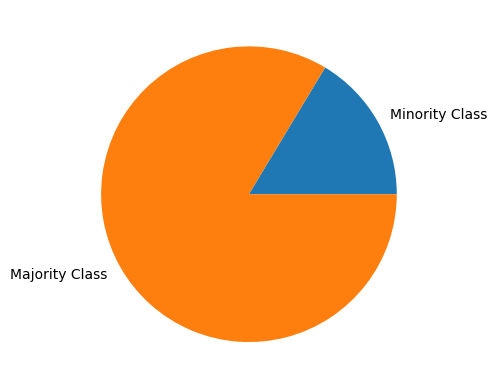

In [58]:
class_division = [ data[data['Response'] == 1 ].shape[0], data[data['Response'] == 0 ].shape[0] ]
my_labels = ['Minority Class', 'Majority Class']

plt.pie(class_division, labels = my_labels)
plt.show()

In [59]:
print("Proportion of Minority Class: " + str(round(data[data['Response'] == 1 ].shape[0]/data.shape[0] * 100, 2)) + "%")

Proportion of Minority Class: 16.38%


In [60]:
from sklearn.model_selection import train_test_split #splitting the data into train and test

X = data.drop(columns= ['id', 'Response']) #Columns to be excluded from training set
y = data['Response'] #defining the Response as y

X.columns = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Female',
       'Gender_Male', 'Vehicle_Age_1_2_Year', 'Vehicle_Age_lessthan_1_Year',
       'Vehicle_Age_greaterthan_2_Years', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

# splitting the data into train and test. Note that here, we have used stratify = y, so that the class imbalances are properly 
# replicated in our train and test dataset. The data is split in a 70-30 ratio of train:test.

In [61]:
print("Proportion of Minority Class in train set: " + str(round(y_train.sum()/len(y_train) * 100, 2)) + "%")
print("Proportion of Minority Class in test set: " + str(round(y_test.sum()/len(y_test) * 100, 2)) + "%")

Proportion of Minority Class in train set: 16.38%
Proportion of Minority Class in test set: 16.38%


# Building a Basic XGBoost Model

In [62]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
test = xgb_classifier.predict(X_test)

In [64]:
print("Accuracy of Test Set:", round(accuracy_score(y_test,test) * 100, 2 ), "%")

Accuracy of Test Set: 84.47 %


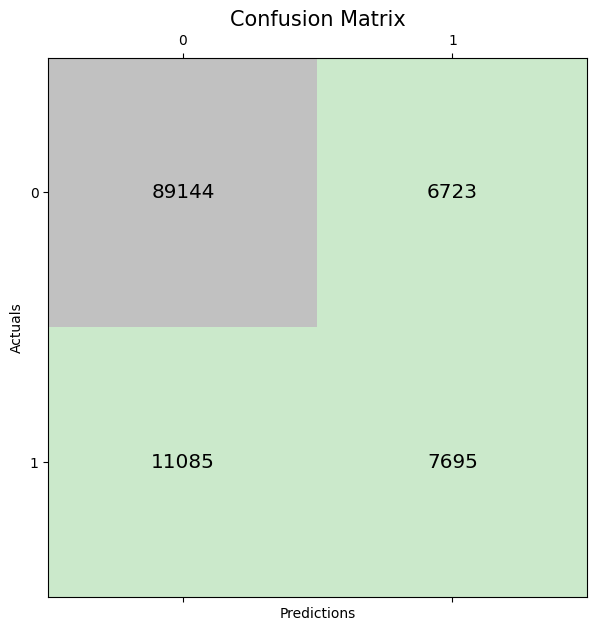

In [65]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=test)

fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [66]:
precision_original =  round(precision_score(y_test, test), 4)
recall_original = round(recall_score(y_test, test), 4)
F1_score_original =  round(f1_score(y_test, test), 4)
metrics_original = [precision_original, recall_original, F1_score_original]

original = pd.DataFrame(metrics_original)
original.index = ['Precision', 'Recall', 'F1_score']
original.columns = ['Original Dataset']
original['Comments'] = ['Only 54% of the customers targetted are actually interested in renewing their insurance',
                       'Only 41% of the potentially interested customers are being identified',
                       '']
original

,Original Dataset,Comments
Precision,0.5337,Only 54% of the customers targetted are actually interested in renewing their insurance
Recall,0.4097,Only 41% of the potentially interested customers are being identified
F1_score,0.4636,


# Changing the threshold

In [67]:
cols = ['Metrics', 'Original']
adj_threshold = pd.DataFrame()
adj_threshold['Original'] = metrics_original
thresholds = [ j/20 for j in range(1,16)]

for i in thresholds:
    y_pred_new_threshold = (xgb_classifier.predict_proba(X_val)[:,1]>=i).astype(int) #calculating the threshold with respect to class 1

    precision_adj_threshold =  round(precision_score(y_val, y_pred_new_threshold, average='binary'), 4)
    recall_adj_threshold = round(recall_score(y_val, y_pred_new_threshold, average='binary'), 4)
    F1_score_adj_threshold =  round((f1_score(y_val, y_pred_new_threshold, average='binary')), 4)
    metrics_adj_threshold = [precision_adj_threshold, recall_adj_threshold, F1_score_adj_threshold]
    name = 'Threshold: ' + str(i) 
    adj_threshold[name] = metrics_adj_threshold
    cols.append(name)


adj_threshold.index = ['Precision', 'Recall', 'F1_score']
adj_threshold = adj_threshold.reset_index()
adj_threshold.columns = cols
adj_threshold.transpose()

adj_threshold1 = adj_threshold.transpose().iloc[1:, :]
adj_threshold1.columns = adj_threshold.iloc[:,0]
adj_threshold1

Metrics,Precision,Recall,F1_score
Original,0.5337,0.4097,0.4636
Threshold: 0.05,0.3556,0.9863,0.5228
Threshold: 0.1,0.387,0.9607,0.5518
Threshold: 0.15,0.4191,0.9249,0.5769
Threshold: 0.2,0.4447,0.8892,0.5929
Threshold: 0.25,0.4657,0.8517,0.6022
Threshold: 0.3,0.4844,0.812,0.6068
Threshold: 0.35,0.4993,0.7653,0.6043
Threshold: 0.4,0.5094,0.702,0.5904
Threshold: 0.45,0.5232,0.5921,0.5555


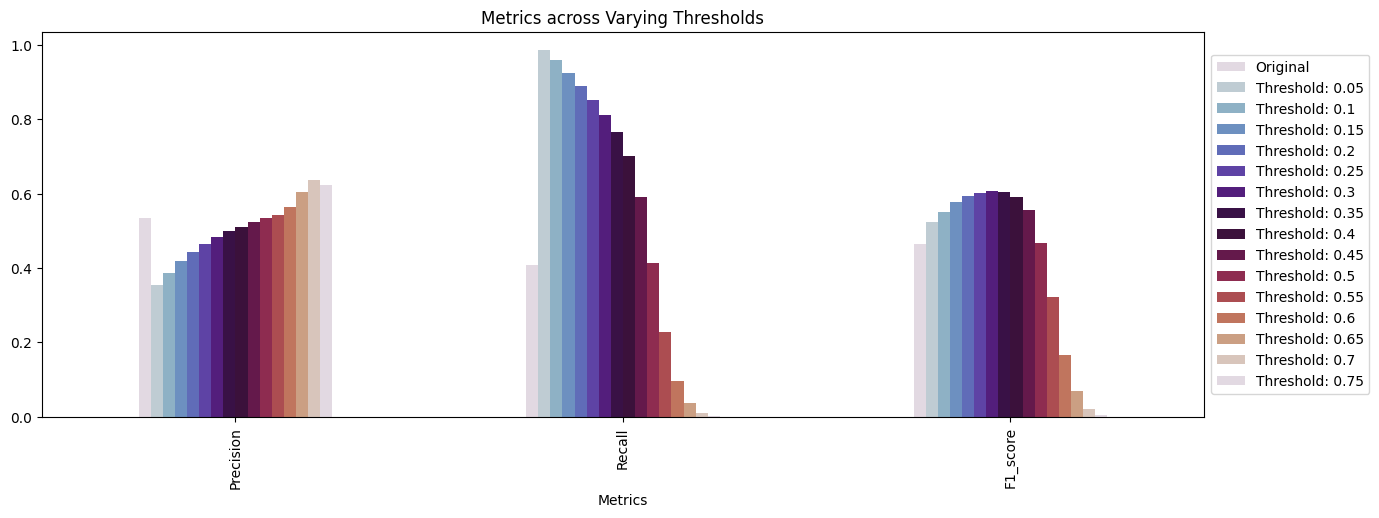

In [68]:
adj_threshold.plot(x='Metrics',
        kind='bar',
        stacked=False,
        title='Metrics across Varying Thresholds',
        figsize=(15, 5),
        cmap = 'twilight').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

## New Classifier with Optimal Threshold

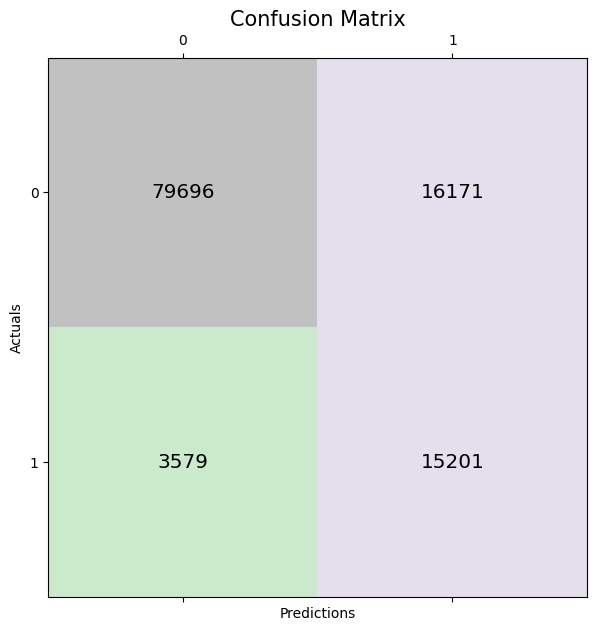

In [69]:
y_pred_new_threshold = (xgb_classifier.predict_proba(X_test)[:,1]>=0.3).astype(int)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_new_threshold)

fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [70]:
precision_changedthreshold =  round(precision_score(y_test, y_pred_new_threshold), 4)
recall_changedthreshold = round(recall_score(y_test, y_pred_new_threshold), 4)
F1_changedthreshold =  round(f1_score(y_test, y_pred_new_threshold), 4)
metrics_changedthreshold = [precision_changedthreshold, recall_changedthreshold, F1_changedthreshold]

changedthreshold = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold)))
changedthreshold.index = ['Precision', 'Recall', 'F1_score']
changedthreshold.columns = ['Original Dataset', 'Threshold Changed Dataset']
changedthreshold

,Original Dataset,Threshold Changed Dataset
Precision,0.5337,0.4845
Recall,0.4097,0.8094
F1_score,0.4636,0.6062


# Oversampling

In [71]:
#Oversampling
train_data=pd.concat([X_train,y_train],axis=1)

Response_Zero=train_data[train_data.Response==0]
Response_One=train_data[train_data.Response==1]

upsampled_One = resample(Response_One,
                          replace=True, # sample with replacement
                          n_samples=len(Response_Zero), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([Response_Zero, upsampled_One])

In [72]:
#Distribution of data in the train set before over-sampling
y_train.value_counts()

Response
0    156579
1     30675
Name: count, dtype: int64

In [73]:
#Distribution of data in the train set after over-sampling
upsampled['Response'].value_counts()

Response
0    156579
1    156579
Name: count, dtype: int64

In [74]:
#Training the model on up-sampled data
X_train_upsampled = upsampled.drop(columns = ['Response'])
y_train_upsampled = upsampled['Response']

xgb_upsampled = xgb.XGBClassifier()

xgb_upsampled.fit(X_train_upsampled,y_train_upsampled)

train_upsampled = xgb_upsampled.predict(X_train_upsampled)
test_upsampled = xgb_upsampled.predict(X_test)

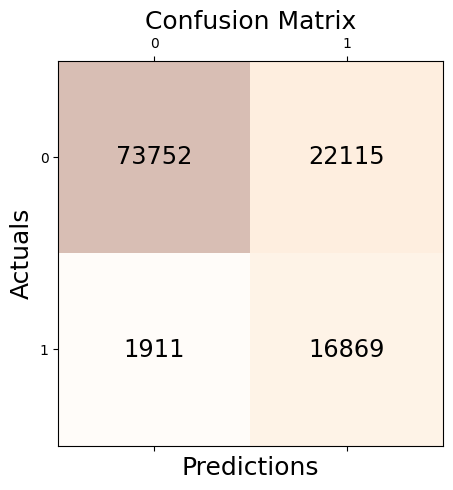

In [75]:
#Confusion matrix on the test set
conf_matrix = confusion_matrix(y_true=y_test, y_pred=test_upsampled)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [76]:
#New efficacy metrics
precision_upsampled =  round(precision_score(y_test, test_upsampled), 4)
recall_upsampled = round(recall_score(y_test, test_upsampled), 4)
F1_upsampled =  round(f1_score(y_test, test_upsampled), 4)
metrics_upsampled = [precision_upsampled, recall_upsampled, F1_upsampled]

upsampled = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold, metrics_upsampled)))
upsampled.index = ['Precision', 'Recall', 'F1_score']
upsampled.columns = ['Original Dataset', 'Threshold = 0.3', 'Upsampled Dataset']
upsampled

,Original Dataset,Threshold = 0.3,Upsampled Dataset
Precision,0.5337,0.4845,0.4327
Recall,0.4097,0.8094,0.8982
F1_score,0.4636,0.6062,0.5841


# Undersampling

In [77]:
#down-sampling
downsampled_Zero = resample(Response_Zero,
                                replace = False, # sample without replacement
                                n_samples = len(Response_One), # match minority n
                                random_state = 27) # reproducible results

#combine minority and downsampled majority
downsampled = pd.concat([downsampled_Zero, Response_One])

In [78]:
#Distribution of majority and minority classes 
y_train.value_counts()

Response
0    156579
1     30675
Name: count, dtype: int64

In [79]:
#Distribution of both the classes after down-sampling
downsampled['Response'].value_counts()

Response
0    30675
1    30675
Name: count, dtype: int64

In [80]:
#Training the model on down-sampled data and testing on the original test dataset
X_train_downsampled = downsampled.drop(columns = ['Response'])
y_train_downsampled = downsampled['Response']

xgb_downsampled = xgb.XGBClassifier()

xgb_downsampled.fit(X_train_downsampled,y_train_downsampled)

train_downsampled = xgb_downsampled.predict(X_train_downsampled)
test_downsampled = xgb_downsampled.predict(X_test)

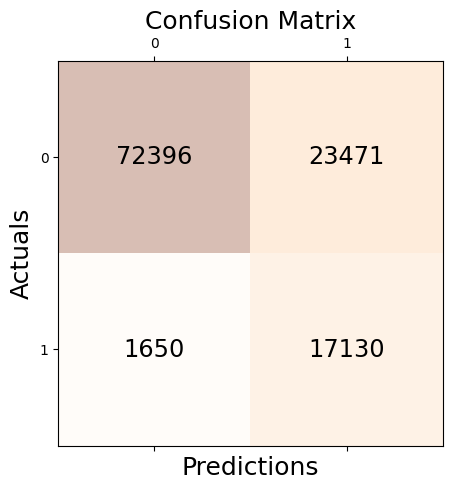

In [81]:
#Confusion metrics of the model built on down-sampled data
conf_matrix = confusion_matrix(y_true=y_test, y_pred=test_downsampled)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [82]:
#Final Metrics

precision_downsampled =  round(precision_score(y_test, test_downsampled), 4)
recall_downsampled = round(recall_score(y_test, test_downsampled), 4)
F1_downsampled =  round(f1_score(y_test, test_downsampled), 4)
metrics_downsampled = [precision_downsampled, recall_downsampled, F1_downsampled]

downsampled = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold,  metrics_upsampled, metrics_downsampled)))
downsampled.index = ['Precision', 'Recall', 'F1_score']
downsampled.columns = ['Original Dataset', 'Threshold = 0.3', 'Upsampled Dataset', 'Downsampled Dataset']
downsampled

,Original Dataset,Threshold = 0.3,Upsampled Dataset,Downsampled Dataset
Precision,0.5337,0.4845,0.4327,0.4219
Recall,0.4097,0.8094,0.8982,0.9121
F1_score,0.4636,0.6062,0.5841,0.5770


# imblearn library

The imbalanced-learn library (often abbreviated as imblearn) is a Python library designed to address the challenges posed by imbalanced datasets in machine learning. An imbalanced dataset occurs when the distribution of classes is not uniform, with one class having significantly fewer instances than another. This imbalance can lead to biased model performance, especially in binary classification problems.

The imbalanced-learn library provides a variety of techniques for handling class imbalance, including:

1. **Oversampling Methods:**. Generating synthetic examples of the minority class to balance class distribution. Examples include SMOTE (Synthetic Minority Over-sampling Technique) and ADASYN (Adaptive Synthetic Sampling).

2. **Undersampling Methods:**. Reducing the number of examples from the majority class to balance the distribution. Examples include RandomUnderSampler and TomekLinks.

3. **Combination Methods:**. Combining oversampling and undersampling strategies. Examples include SMOTEENN and SMOTETomek.

4. **Weighting Methods:**. Assigning different weights to classes during training to give more importance to the minority class. Examples include the inverse class frequency approach and custom weight approach.

imbalanced-learn is an extension of the scikit-learn library and can be easily integrated with other machine learning methods available in scikit-learn.

To use imbalanced-learn, you can install it using the following command:

```bash
pip install -U imbalanced-learn
```

Once installed, you can import its functions and classes into your Python script to implement class balancing techniques on imbalanced datasets.

In [83]:
#pip install -U imbalanced-learn

In [84]:
# check version number
import imblearn
print(imblearn.__version__)

0.11.0


## SMOTE

SMOTE, which stands for Synthetic Minority Over-sampling Technique, is a technique used to address class imbalance in machine learning datasets. It works by generating synthetic examples of the minority class to balance the class distribution. SMOTE helps address the issue of imbalanced datasets by creating new synthetic instances rather than replicating existing ones. This helps prevent overfitting on the minority class and can improve the performance of machine learning models.

Steps of the SMOTE technique:

1. **Identify Minority Class Instances**. SMOTE focuses on the minority class, which is the class with fewer instances.

2. **Select a Minority Instance**. For each instance in the minority class, SMOTE selects a data point.

3. **Identify k Nearest Neighbors:**. SMOTE then identifies the k nearest neighbors of the selected instance. The value of k is a parameter specified by the user.

4. **Generate Synthetic Examples**. For the selected instance, SMOTE generates synthetic examples by interpolating between the selected instance and its k nearest neighbors. The interpolation is done by taking the difference between feature values of the selected instance and each neighbor and multiplying it by a random number between 0 and 1. The result is added to the selected instance to create a synthetic example.

5. **Repeat for Other Instances**. Steps 2-4 are repeated for all instances in the minority class.

6. **Incorporate Synthetic Examples.**. The synthetic examples are incorporated into the dataset, increasing the representation of the minority class.


Regarding step 4 above, the mathematical formulation is given by the following expression:

 $$
 x_{new} = x_i + \lambda \times (x_{zi} - x_i)
 $$

In the above expression, $\lambda$ is a random number in the range $[0,1]$. This interpolation will create a sample on the line between 
$x_i$ and $x_{zi}$. The following image gives an intuition about how SMOTE does such interpolation to generation synthetic examples.

<p align="center">
<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_generation_sample_001.png" alt="drawing" width="400"/>
</p>

In [85]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote_oversample = SMOTE()


In [86]:
X_train_smote, y_train_smote = smote_oversample.fit_resample(X_train, y_train)

In [87]:
from collections import Counter

# summarize the new class distribution
counter = Counter(y_train_smote)
print(counter)

Counter({0: 156579, 1: 156579})


In [88]:
#Training the model on SMOTE p-sampled data and testing on the original test dataset

xgb_smote = xgb.XGBClassifier()

xgb_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = xgb_smote.predict(X_test)

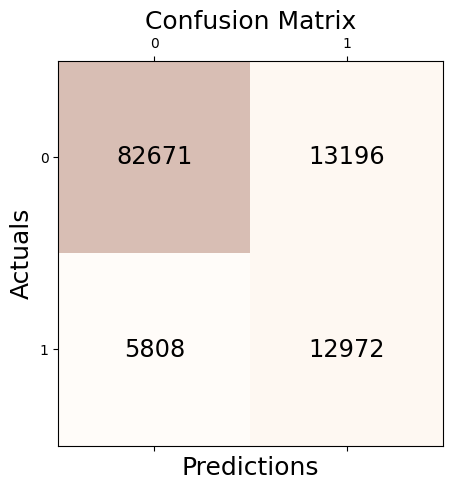

In [89]:
#Confusion metrics of the model built on down-sampled data
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_smote)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [90]:
precision_smote =  round(precision_score(y_test, y_pred_smote), 4)
recall_smote = round(recall_score(y_test, y_pred_smote), 4)
F1_smote =  round(f1_score(y_test, y_pred_smote), 4)
metrics_smote = [precision_smote, recall_smote, F1_smote]

results = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold,  metrics_upsampled, metrics_downsampled, metrics_smote)))
results.index = ['Precision', 'Recall', 'F1_score']
results.columns = ['Original Dataset', 'Threshold = 0.3', 'Upsampled Dataset', 'Downsampled Dataset', 'SMOTE upsampled']
results

,Original Dataset,Threshold = 0.3,Upsampled Dataset,Downsampled Dataset,SMOTE upsampled
Precision,0.5337,0.4845,0.4327,0.4219,0.4957
Recall,0.4097,0.8094,0.8982,0.9121,0.6907
F1_score,0.4636,0.6062,0.5841,0.5770,0.5772
